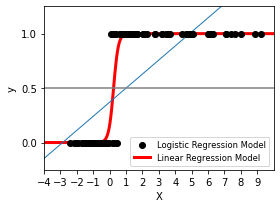

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression
from scipy.special import expit

# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color="red", linewidth=3)

ols = LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    ("Logistic Regression Model", "Linear Regression Model"),
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()